### Exercício de Fixação de Conceitos (EFC) 5 – Transformada Discreta de Fourier
### Gustavo Nascimento Soares - 217530

In [1]:
from numpy import linspace, pi, sin
import matplotlib.pyplot as plt

from dft_sin import dft_sin

### a)
----

<StemContainer object of 3 artists>

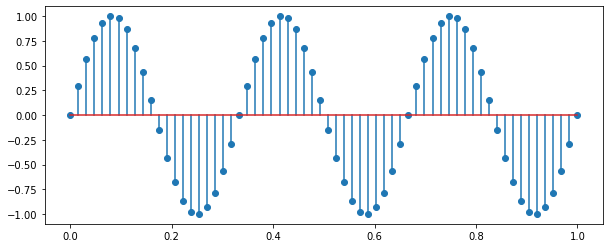

In [2]:
N, f0 = 64, 3

n = linspace(0, 1, N)
x = sin(2*pi*f0*n)

plt.figure(figsize=(10, 4))
plt.stem(n, x)

### b)
----
$$X(e^{j \Omega}) = \sum_{n=0}^{N-1}sin(2\pi \frac{f_0}{f_s} n)exp(-j \Omega n)$$

$$\therefore\ X(e^{j \Omega}) = \frac{-j}{2}\left(\sum_{n=0}^{N-1}exp\left(j \left(2\pi\frac{f_0}{f_s} - \Omega\right) n\right) - \sum_{n=0}^{N-1}exp\left(-j \left(2\pi\frac{f_0}{f_s} + \Omega\right) n\right)\right)$$

$$\therefore\ X(e^{j \Omega}) = \frac{-j}{2}\left(\frac{1 - exp\left(j \left(2\pi\frac{f_0}{f_s} - \Omega\right) N\right)}{1 - exp\left(j \left(2\pi\frac{f_0}{f_s} - \Omega\right)\right)} - \frac{1 - exp\left(-j \left(2\pi\frac{f_0}{f_s} + \Omega\right) N\right)}{1 - exp\left(-j \left(2\pi\frac{f_0}{f_s} + \Omega\right)\right)}\right)$$

$$\therefore\ X(e^{j \Omega}) = \frac{-j}{2}\left(\frac{sin\left(\frac{N}{2}\left(2\pi\frac{f_0}{f_s} - \Omega\right)\right)}{sin\left(\frac{1}{2}\left(2\pi\frac{f_0}{f_s} - \Omega\right)\right)}exp\left(j\frac{N - 1}{2}\left(2\pi\frac{f_0}{f_s} - \Omega\right) \right) - \frac{sin\left(\frac{N}{2}\left(2\pi\frac{f_0}{f_s} + \Omega\right)\right)}{sin\left(\frac{1}{2}\left(2\pi\frac{f_0}{f_s} + \Omega\right)\right)}exp\left(-j\frac{N - 1}{2}\left(2\pi\frac{f_0}{f_s} + \Omega\right) \right)\right)$$

### c)
----

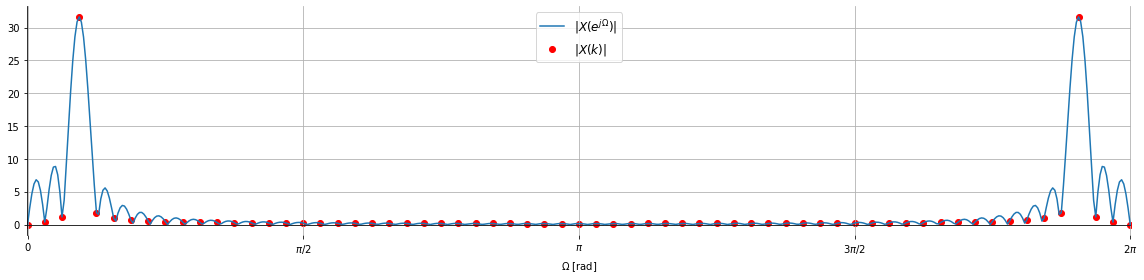

In [3]:
dft_sin(N, f0, N)

Sabendo que:

$$X(j\omega) = -\pi j \ \left(\delta(\omega - 2\pi f_0) + \delta(\omega + 2\pi f_0)\right),$$

pode-se observar que os pontos de maior amplitude em $|X(e^{j\Omega})|$ estão na mesma posição dos impulsos que compõem $X(j\omega)$. $X(e^{j\Omega})$ difere de $X(j\omega)$ porque o sinal discreto usado para gerar $|X(e^{j\Omega})|$ é finito a partir de um janelamento no tempo. Assim, quanto maior for a janela usada, mais o espectro deve se aproximar de um impulso nas mesmas posições que aparecem em $X(j\omega)$ e os demais pontos devem se aproximar mais de $0$.

As oscilações de $X(e^{j\Omega})$ são originadas do janelamento do sinal. Como a transformada de Fourier de uma onda quadrada é uma função $sinc$, há pontos dessa transformada em que ela corta o eixo x. Analisando $|X(e^{j\Omega})|$, esses pontos se mostram nos mínimos locais encontrados. Pode-se observar que esses pontos correspondem a múltiplos inteiros de $\frac{\omega_0}{N}$. A exceção são os múltiplos que correspondem à frequência fundamental, onde aparecem impulsos no espectro da senoide pura.

A Transformada Discreta de Fourier pode ser interpretada como uma amostragem ideal de $X(e^{j\Omega})$ nos múltiplos inteiros de $\frac{\omega_0}{N}$. Com essa informação e as relações entre $X(e^{j\Omega})$ e $X(j\omega)$, é possível compreender o comportamento da DFT. Nesse caso, ela se aproxima do espectro da senoide pura por possuir valores próximos de $0$ em todo o espectro exceto pelos pontos correspondentes à frequência fundamental do sinal.

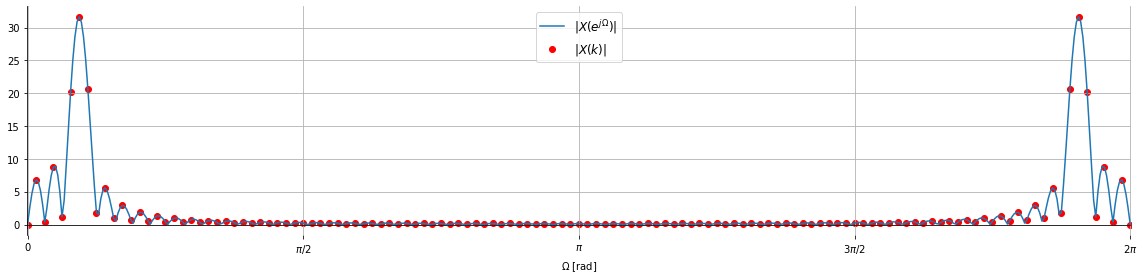

In [4]:
dft_sin(N, f0, 2*N)

Nesse caso, a DFT é uma amostragem ideal de $X(e^{j\Omega})$ nos múltiplos inteiros de $\frac{\omega_0}{2N}$. Com isso, o espectro obtido não mais se assemelha ao da senoide pura, já que há diversos pontos significamente diferentes de $0$ em pontos que não correspondem à frequência fundamental do sinal.

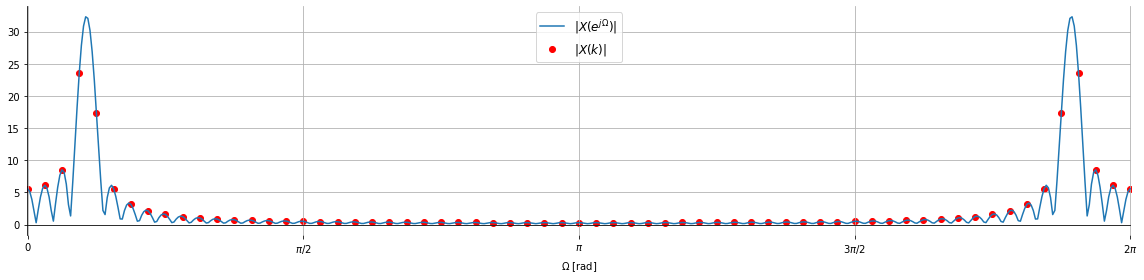

In [5]:
dft_sin(N, 3.4, N)

Aqui, o espectro obtido também se distancia da senoide pura pelo mesmo motivo. Mas a causa é que a frequência fundamental não é mais inteira. Por exemplo, o valor de $\Omega$ correspondente à área do impulso referente à frequência fundamental no espectro da senoide pura é $\frac{2\pi 3.4}{N}$. Assim, não há $k \in \mathbb{Z}$ em que $\frac{2\pi k}{N} = \frac{2\pi 3.4}{N}$. Portanto, os valores observados na DFT não são compatíveis com o espectro da senoide pura.